# tutorials for NN

Following these tutorials (in order)
* LSTM Time Series Forecasting https://www.youtube.com/watch?v=c0k-YLQGKjY
* Multivariate Time Series Forecasting Using LSTM, GRU & 1d CNNs https://www.youtube.com/watch?v=kGdbPnMCdOg

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

2023-11-08 13:27:14.160914: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-08 13:27:15.542689: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 13:27:15.542776: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 13:27:15.546981: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 13:27:16.136063: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-08 13:27:16.138527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [48]:
df = pd.read_pickle('../data/pickled_data/AFL259_short.pkl')
df.reset_index(inplace=True,drop=True)
df.head(15)

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
0,2006-02-07,91.0100,21.65,9420.0,0.00,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.0000,0.00,0.0
1,2006-02-08,91.0429,21.64,9380.0,0.00,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.0000,0.00,0.0
2,2006-02-09,91.1096,21.58,9210.0,0.00,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.7175,17.22,0.0
3,2006-02-10,91.1954,21.46,8830.0,0.00,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.0000,0.00,0.0
4,2006-02-11,91.3012,21.36,8550.0,0.00,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.0000,0.00,0.0
5,2006-02-12,91.4004,21.28,8330.0,0.00,31.932083,43.92,24.57,1035.333333,68.041667,87.0,44.0,6.179583,9.17,3.36,0.0000,0.00,0.0
6,2006-02-13,91.5129,21.10,7820.0,0.10,31.004848,35.42,26.37,1025.878788,91.121212,96.0,81.0,7.274242,19.46,0.00,0.0000,0.00,0.0
7,2006-02-14,91.6071,20.97,7460.0,0.00,25.755417,35.42,18.34,1021.125000,76.083333,98.0,51.0,7.147917,10.29,3.36,0.0000,0.00,0.0
8,2006-02-15,91.7167,20.91,7300.0,0.00,25.828750,35.62,17.37,1019.750000,66.083333,88.0,33.0,6.552083,10.29,3.36,0.0000,0.00,0.0
9,2006-02-16,91.7925,20.81,7040.0,0.06,22.394400,27.81,12.18,1023.360000,65.240000,85.0,31.0,13.198800,26.17,2.24,8.4468,33.11,0.0


In [3]:
df.index = df.date
df

,date,avg_well_depth,gage_ht,discharge_cfs,prcp,temp_avg,temp_max,temp_min,hPa_avg,hum_avg,hum_max,hum_min,wind_avg,wind_max,wind_min,gust_avg,gust_max,gust_min
date,,,,,,,,,,,,,,,,,,
2006-02-07,2006-02-07,91.0100,21.65,9420.0,0.0,35.722500,46.31,28.26,1028.625000,76.375000,93.0,47.0,5.826667,10.29,3.36,0.000000,0.00,0.0
2006-02-08,2006-02-08,91.0429,21.64,9380.0,0.0,35.124167,42.46,28.72,1026.625000,84.416667,100.0,69.0,6.366250,11.41,3.36,0.000000,0.00,0.0
2006-02-09,2006-02-09,91.1096,21.58,9210.0,0.0,32.172500,43.05,24.44,1035.041667,64.541667,98.0,30.0,8.732917,13.87,5.82,0.717500,17.22,0.0
2006-02-10,2006-02-10,91.1954,21.46,8830.0,0.0,31.252083,42.04,24.33,1038.958333,56.250000,81.0,27.0,9.655417,16.11,5.82,0.000000,0.00,0.0
2006-02-11,2006-02-11,91.3012,21.36,8550.0,0.0,30.429583,42.46,21.51,1037.583333,61.708333,84.0,36.0,7.250417,10.29,3.36,0.000000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-02,2018-06-02,79.4696,21.84,10000.0,0.0,62.812083,77.25,46.35,1022.750000,48.333333,83.0,24.0,6.976250,11.50,3.44,0.000000,0.00,0.0
2018-06-03,2018-06-03,80.0721,21.59,9240.0,0.0,69.826250,86.25,52.66,1013.875000,46.416667,79.0,23.0,10.141667,21.92,3.44,3.165833,29.97,0.0
2018-06-04,2018-06-04,80.4046,21.50,8970.0,0.0,62.956250,71.67,56.35,1012.833333,41.666667,65.0,18.0,14.850000,23.04,8.05,4.030417,28.77,0.0


In [4]:
df.index

DatetimeIndex(['2006-02-07', '2006-02-08', '2006-02-09', '2006-02-10',
               '2006-02-11', '2006-02-12', '2006-02-13', '2006-02-14',
               '2006-02-15', '2006-02-16',
               ...
               '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31',
               '2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06'],
              dtype='datetime64[ns]', name='date', length=4503, freq=None)

<Axes: xlabel='date'>

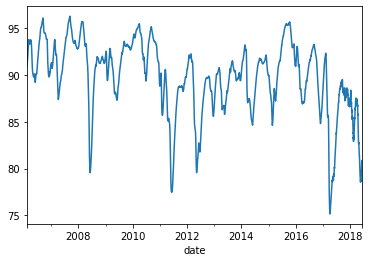

In [5]:
well = df.avg_well_depth
well.plot()

In [6]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [[a] for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
WINDOW_SIZE = 5
X, y = df_to_X_y(well, WINDOW_SIZE)
X.shape, y.shape

((4498, 5, 1), (4498,))

### Train Test Split

In [8]:
X_train, y_train = X[:3498], y[:3498]
X_val, y_val = X[3498:3998], y[3498:3998]
X_test, y_test = X[3998:], y[3998:]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((3498, 5, 1), (3498,), (500, 5, 1), (500,), (500, 5, 1), (500,))

In [9]:
X_train, y_train

(array([[[91.01  ],
         [91.0429],
         [91.1096],
         [91.1954],
         [91.3012]],
 
        [[91.0429],
         [91.1096],
         [91.1954],
         [91.3012],
         [91.4004]],
 
        [[91.1096],
         [91.1954],
         [91.3012],
         [91.4004],
         [91.5129]],
 
        ...,
 
        [[95.4479],
         [95.4433],
         [95.4413],
         [95.4196],
         [95.4054]],
 
        [[95.4433],
         [95.4413],
         [95.4196],
         [95.4054],
         [95.3908]],
 
        [[95.4413],
         [95.4196],
         [95.4054],
         [95.3908],
         [95.3604]]]),
 array([91.4004, 91.5129, 91.6071, ..., 95.3908, 95.3604, 95.3237]))

### Tensorflow things

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model

## Build LSTM single variable model

In [11]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

2023-11-08 13:27:30.387895: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-08 13:27:30.390436: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17425 (68.07 KB)
Trainable params: 17425 (68.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
cp = ModelCheckpoint('meremodel1/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp])

Epoch 1/50
 97/110 [=========================>....] - ETA: 0s - loss: 7367.6738 - root_mean_squared_error: 85.8352INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 4s 23ms/step - loss: 7214.2896 - root_mean_squared_error: 84.9370 - val_loss: 5794.7920 - val_root_mean_squared_error: 76.1235
Epoch 2/50
100/110 [==========================>...] - ETA: 0s - loss: 4472.8755 - root_mean_squared_error: 66.8796INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 4374.0522 - root_mean_squared_error: 66.1366 - val_loss: 3253.6709 - val_root_mean_squared_error: 57.0410
Epoch 3/50
100/110 [==========================>...] - ETA: 0s - loss: 2414.4004 - root_mean_squared_error: 49.1365INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 2346.5864 - root_mean_squared_error: 48.4416 - val_loss: 1561.4913 - val_root_mean_squared_error: 39.5157
Epoch 4/50
100/110 [==========================>...] - ETA: 0s - loss: 1022.6260 - root_mean_squared_error: 31.9785INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 985.0059 - root_mean_squared_error: 31.3848 - val_loss: 554.4768 - val_root_mean_squared_error: 23.5473
Epoch 5/50
 95/110 [========================>.....] - ETA: 0s - loss: 331.7774 - root_mean_squared_error: 18.2148INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 309.6896 - root_mean_squared_error: 17.5980 - val_loss: 147.2255 - val_root_mean_squared_error: 12.1337
Epoch 6/50
 94/110 [========================>.....] - ETA: 0s - loss: 82.9076 - root_mean_squared_error: 9.1054INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 76.4180 - root_mean_squared_error: 8.7417 - val_loss: 33.5141 - val_root_mean_squared_error: 5.7891
Epoch 7/50
100/110 [==========================>...] - ETA: 0s - loss: 22.7200 - root_mean_squared_error: 4.7666INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 21.9599 - root_mean_squared_error: 4.6861 - val_loss: 11.7635 - val_root_mean_squared_error: 3.4298
Epoch 8/50
 96/110 [=========================>....] - ETA: 0s - loss: 13.3778 - root_mean_squared_error: 3.6576INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 13.1764 - root_mean_squared_error: 3.6299 - val_loss: 8.4140 - val_root_mean_squared_error: 2.9007
Epoch 9/50
 98/110 [=========================>....] - ETA: 0s - loss: 12.1192 - root_mean_squared_error: 3.4813INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 12.1859 - root_mean_squared_error: 3.4908 - val_loss: 7.9590 - val_root_mean_squared_error: 2.8212
Epoch 10/50
 98/110 [=========================>....] - ETA: 0s - loss: 11.7057 - root_mean_squared_error: 3.4214INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 11.5550 - root_mean_squared_error: 3.3993 - val_loss: 7.3662 - val_root_mean_squared_error: 2.7141
Epoch 11/50
 99/110 [==========================>...] - ETA: 0s - loss: 9.7888 - root_mean_squared_error: 3.1287INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 9.7364 - root_mean_squared_error: 3.1203 - val_loss: 6.1942 - val_root_mean_squared_error: 2.4888
Epoch 12/50
110/110 [==============================] - 0s 2ms/step - loss: 8.0175 - root_mean_squared_error: 2.8315 - val_loss: 6.3710 - val_root_mean_squared_error: 2.5241
Epoch 13/50
 99/110 [==========================>...] - ETA: 0s - loss: 6.5684 - root_mean_squared_error: 2.5629INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 6.4737 - root_mean_squared_error: 2.5443 - val_loss: 4.5520 - val_root_mean_squared_error: 2.1335
Epoch 14/50
100/110 [==========================>...] - ETA: 0s - loss: 4.6701 - root_mean_squared_error: 2.1610INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 4.6048 - root_mean_squared_error: 2.1459 - val_loss: 2.9168 - val_root_mean_squared_error: 1.7079
Epoch 15/50
100/110 [==========================>...] - ETA: 0s - loss: 2.8115 - root_mean_squared_error: 1.6768INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 2.7610 - root_mean_squared_error: 1.6616 - val_loss: 1.7887 - val_root_mean_squared_error: 1.3374
Epoch 16/50
100/110 [==========================>...] - ETA: 0s - loss: 1.2204 - root_mean_squared_error: 1.1047INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 1.1797 - root_mean_squared_error: 1.0862 - val_loss: 0.6450 - val_root_mean_squared_error: 0.8031
Epoch 17/50
101/110 [==========================>...] - ETA: 0s - loss: 0.5211 - root_mean_squared_error: 0.7218INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.5090 - root_mean_squared_error: 0.7134 - val_loss: 0.3455 - val_root_mean_squared_error: 0.5878
Epoch 18/50
 97/110 [=========================>....] - ETA: 0s - loss: 0.3258 - root_mean_squared_error: 0.5708INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.3241 - root_mean_squared_error: 0.5693 - val_loss: 0.2255 - val_root_mean_squared_error: 0.4748
Epoch 19/50
 96/110 [=========================>....] - ETA: 0s - loss: 0.2385 - root_mean_squared_error: 0.4883INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.2350 - root_mean_squared_error: 0.4848 - val_loss: 0.1708 - val_root_mean_squared_error: 0.4133
Epoch 20/50
100/110 [==========================>...] - ETA: 0s - loss: 0.1851 - root_mean_squared_error: 0.4303INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.1857 - root_mean_squared_error: 0.4309 - val_loss: 0.1359 - val_root_mean_squared_error: 0.3686
Epoch 21/50
101/110 [==========================>...] - ETA: 0s - loss: 0.1527 - root_mean_squared_error: 0.3907INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.1506 - root_mean_squared_error: 0.3880 - val_loss: 0.1250 - val_root_mean_squared_error: 0.3536
Epoch 22/50
101/110 [==========================>...] - ETA: 0s - loss: 0.1304 - root_mean_squared_error: 0.3611INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.1302 - root_mean_squared_error: 0.3608 - val_loss: 0.1133 - val_root_mean_squared_error: 0.3367
Epoch 23/50
110/110 [==============================] - 0s 2ms/step - loss: 0.1229 - root_mean_squared_error: 0.3506 - val_loss: 0.1370 - val_root_mean_squared_error: 0.3701
Epoch 24/50
100/110 [==========================>...] - ETA: 0s - loss: 0.1094 - root_mean_squared_error: 0.3308INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.1084 - root_mean_squared_error: 0.3292 - val_loss: 0.0771 - val_root_mean_squared_error: 0.2776
Epoch 25/50
 93/110 [========================>.....] - ETA: 0s - loss: 0.0849 - root_mean_squared_error: 0.2914INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0855 - root_mean_squared_error: 0.2925 - val_loss: 0.0662 - val_root_mean_squared_error: 0.2574
Epoch 26/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0835 - root_mean_squared_error: 0.2890 - val_loss: 0.0736 - val_root_mean_squared_error: 0.2713
Epoch 27/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0719 - root_mean_squared_error: 0.2681 - val_loss: 0.0739 - val_root_mean_squared_error: 0.2719
Epoch 28/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0660 - root_mean_squared_error: 0.2569 - val_loss: 0.0972 - val_root_mean_squared_error: 0.3118
Epoch 29/50
101/110 [==========================>...] - ETA: 0s - loss: 0.0575 - root_mean_squared_error: 0.2398INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0583 - root_mean_squared_error: 0.2414 - val_loss: 0.0563 - val_root_mean_squared_error: 0.2372
Epoch 30/50
101/110 [==========================>...] - ETA: 0s - loss: 0.0544 - root_mean_squared_error: 0.2333INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0531 - root_mean_squared_error: 0.2304 - val_loss: 0.0433 - val_root_mean_squared_error: 0.2081
Epoch 31/50
101/110 [==========================>...] - ETA: 0s - loss: 0.0444 - root_mean_squared_error: 0.2106INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0439 - root_mean_squared_error: 0.2095 - val_loss: 0.0393 - val_root_mean_squared_error: 0.1983
Epoch 32/50
101/110 [==========================>...] - ETA: 0s - loss: 0.0475 - root_mean_squared_error: 0.2178INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0465 - root_mean_squared_error: 0.2155 - val_loss: 0.0352 - val_root_mean_squared_error: 0.1875
Epoch 33/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0436 - root_mean_squared_error: 0.2087 - val_loss: 0.0446 - val_root_mean_squared_error: 0.2111
Epoch 34/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0412 - root_mean_squared_error: 0.2030 - val_loss: 0.0409 - val_root_mean_squared_error: 0.2021
Epoch 35/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0422 - root_mean_squared_error: 0.2055 - val_loss: 0.0538 - val_root_mean_squared_error: 0.2319
Epoch 36/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0397 - root_mean_squared_error: 0.1994 - val_loss: 0.0415 - val_root_mean_squared_error: 0.2037
Epoch 37/50
101/110 [==========================>...] - ETA: 0s - loss: 0.0342 - root_mean_squared_error: 0.1849INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0344 - root_mean_squared_error: 0.1854 - val_loss: 0.0290 - val_root_mean_squared_error: 0.1704
Epoch 38/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0331 - root_mean_squared_error: 0.1820 - val_loss: 0.0461 - val_root_mean_squared_error: 0.2148
Epoch 39/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0355 - root_mean_squared_error: 0.1883 - val_loss: 0.0378 - val_root_mean_squared_error: 0.1943
Epoch 40/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0406 - root_mean_squared_error: 0.2015INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0399 - root_mean_squared_error: 0.1998 - val_loss: 0.0243 - val_root_mean_squared_error: 0.1560
Epoch 41/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0314 - root_mean_squared_error: 0.1773 - val_loss: 0.0246 - val_root_mean_squared_error: 0.1568
Epoch 42/50
102/110 [==========================>...] - ETA: 0s - loss: 0.0341 - root_mean_squared_error: 0.1846INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0338 - root_mean_squared_error: 0.1837 - val_loss: 0.0231 - val_root_mean_squared_error: 0.1521
Epoch 43/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0288 - root_mean_squared_error: 0.1696 - val_loss: 0.0310 - val_root_mean_squared_error: 0.1760
Epoch 44/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0286 - root_mean_squared_error: 0.1692 - val_loss: 0.0698 - val_root_mean_squared_error: 0.2642
Epoch 45/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0285 - root_mean_squared_error: 0.1687INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0284 - root_mean_squared_error: 0.1684 - val_loss: 0.0222 - val_root_mean_squared_error: 0.1488
Epoch 46/50
102/110 [==========================>...] - ETA: 0s - loss: 0.0265 - root_mean_squared_error: 0.1626INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 19ms/step - loss: 0.0265 - root_mean_squared_error: 0.1627 - val_loss: 0.0203 - val_root_mean_squared_error: 0.1426
Epoch 47/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0264 - root_mean_squared_error: 0.1626INFO:tensorflow:Assets written to: meremodel1/assets


INFO:tensorflow:Assets written to: meremodel1/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0266 - root_mean_squared_error: 0.1631 - val_loss: 0.0194 - val_root_mean_squared_error: 0.1392
Epoch 48/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0280 - root_mean_squared_error: 0.1673 - val_loss: 0.0227 - val_root_mean_squared_error: 0.1505
Epoch 49/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0257 - root_mean_squared_error: 0.1603 - val_loss: 0.0458 - val_root_mean_squared_error: 0.2141
Epoch 50/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0273 - root_mean_squared_error: 0.1653 - val_loss: 0.0542 - val_root_mean_squared_error: 0.2328


In [14]:
model1 = load_model('meremodel1/')

In [15]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train_Predictions':train_predictions, 'Actuals':y_train})
train_results

110/110 [==============================] - 0s 1ms/step


,Train_Predictions,Actuals
0,91.251945,91.4004
1,91.358276,91.5129
2,91.469597,91.6071
3,91.574715,91.7167
4,91.681526,91.7925
...,...,...
3493,95.226547,95.4196
3494,95.215279,95.4054
3495,95.201813,95.3908
3496,95.190346,95.3604


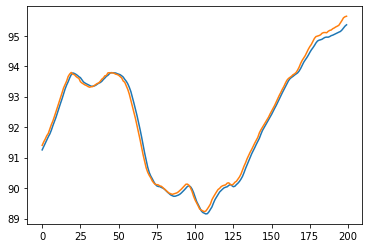

In [16]:
# just the training
plt.plot(train_results['Train_Predictions'][:200])
plt.plot(train_results['Actuals'][:200])

16/16 [==============================] - 0s 1ms/step


,Val_Predictions,Actuals
0,95.143547,95.3354
1,95.138222,95.3287
2,95.138405,95.3083
3,95.126251,95.3333
4,95.132484,95.3454
...,...,...
495,90.824471,91.0012
496,90.940849,91.1050
497,91.050491,91.2146
498,91.161636,91.3029


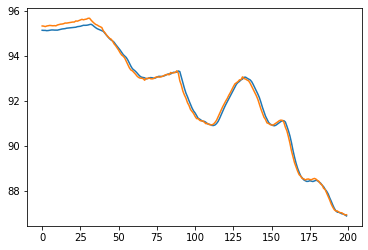

In [17]:
# how about validation
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val_Predictions':val_predictions, 'Actuals':y_val})
display(val_results)

plt.plot(val_results['Val_Predictions'][:200])
plt.plot(val_results['Actuals'][:200])

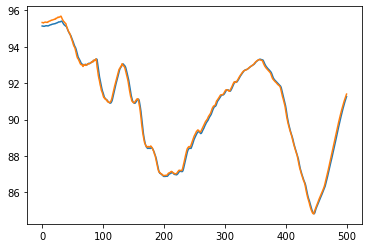

In [18]:
plt.plot(val_results['Val_Predictions'])
plt.plot(val_results['Actuals'])

### Results of single variable model

16/16 [==============================] - 0s 1ms/step


,Test_Predictions,Actuals
0,91.357109,91.4921
1,91.455177,91.5775
2,91.546608,91.6546
3,91.629387,91.7333
4,91.709946,91.7912
...,...,...
495,79.341209,79.4696
496,79.473595,80.0721
497,80.028641,80.4046
498,80.420288,80.6565


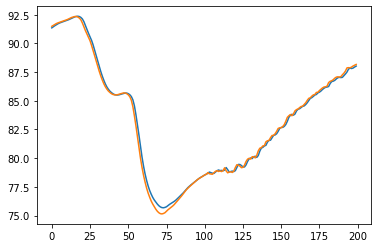

In [19]:
# how about test
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test_Predictions':test_predictions, 'Actuals':y_test})
display(test_results)

plt.plot(test_results['Test_Predictions'][:200])
plt.plot(test_results['Actuals'][:200])

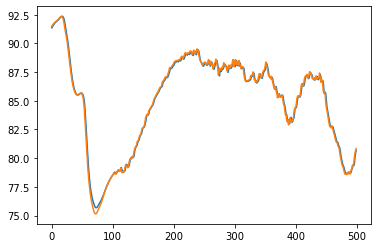

In [20]:
plt.plot(test_results['Test_Predictions'])
plt.plot(test_results['Actuals'])

#### A prettier graph for single variable results:

In [21]:
test_results['date'] = date_rng = pd.date_range(start='2017-01-23', end='2018-06-06', freq='D')
# last 500 days from the df
test_results

,Test_Predictions,Actuals,date
0,91.357109,91.4921,2017-01-23
1,91.455177,91.5775,2017-01-24
2,91.546608,91.6546,2017-01-25
3,91.629387,91.7333,2017-01-26
4,91.709946,91.7912,2017-01-27
...,...,...,...
495,79.341209,79.4696,2018-06-02
496,79.473595,80.0721,2018-06-03
497,80.028641,80.4046,2018-06-04
498,80.420288,80.6565,2018-06-05


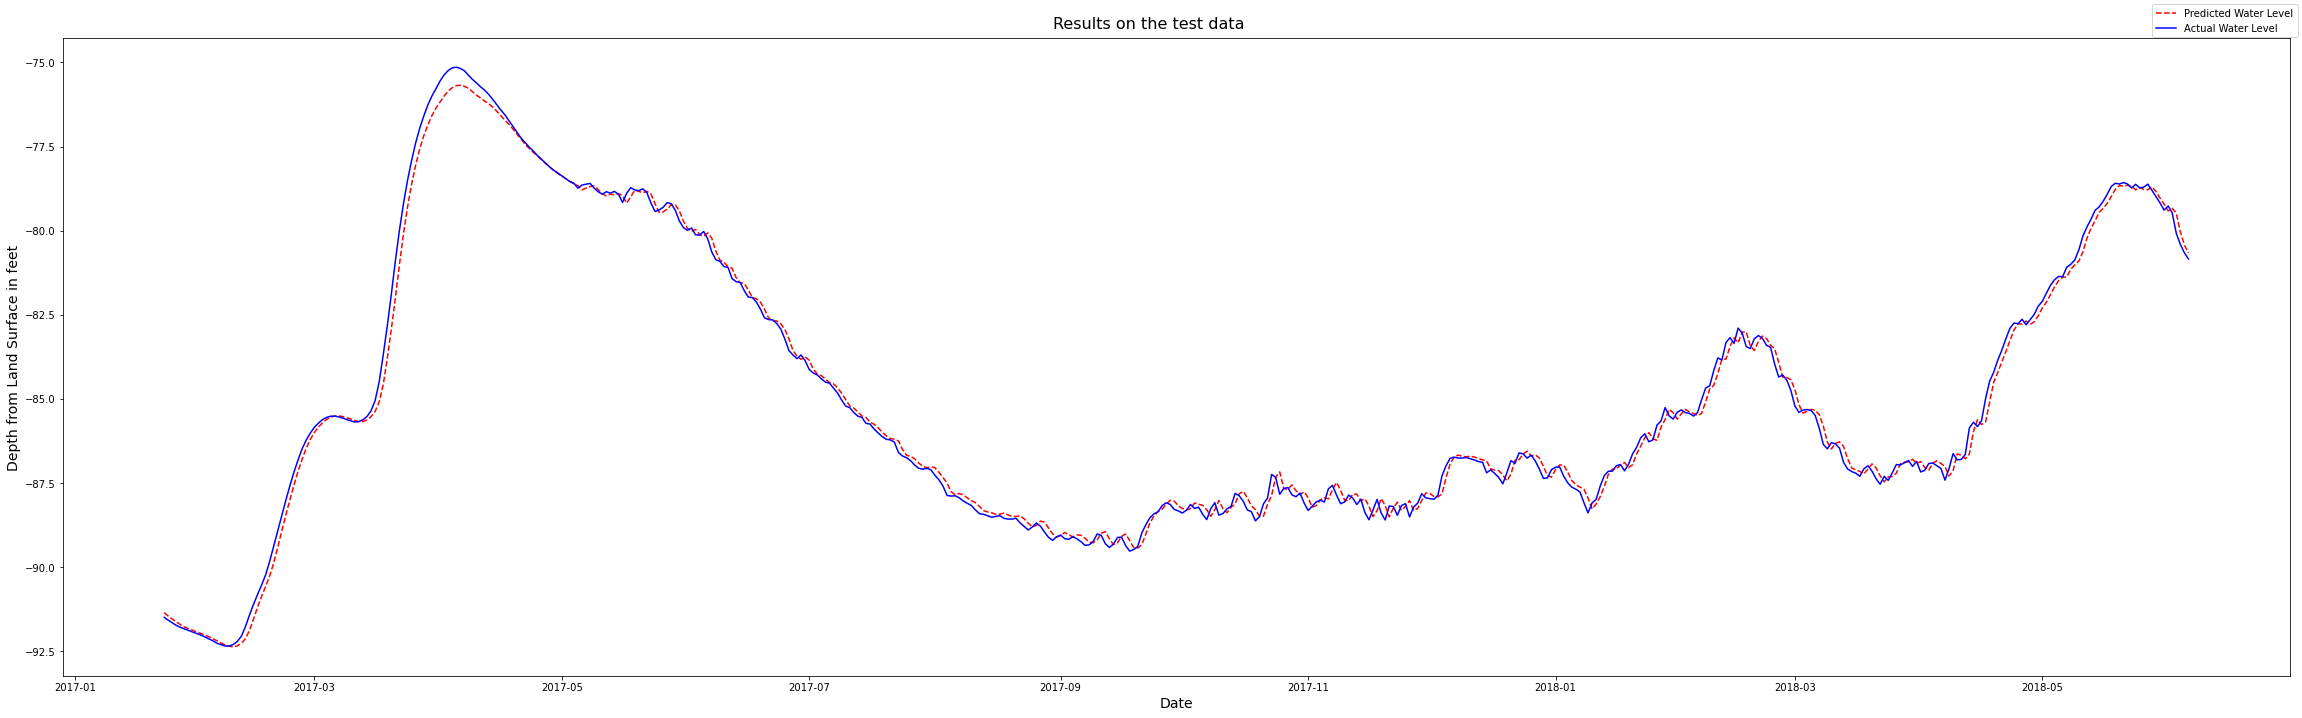

In [22]:
y = test_results.date.values
X = test_results.Test_Predictions.values*-1
X1 = test_results.Actuals.values*-1


fig, ax1 = plt.subplots(figsize=(32, 10)) #big for copy paste reasons
plt.suptitle('Results on the test data', fontsize=16)

ax1 = plt.subplot()
plt.plot(y, X, 'r--', label = 'Predicted Water Level')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Depth from Land Surface in feet', fontsize=14)

ax2 = plt.subplot()
ax2.plot(y,X1, 'b-', label = 'Actual Water Level')

fig.legend()

fig.tight_layout()
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, X, y):
    predictions = model.predict(X).flatten()
    df_plot = pd.DataFrame(data={'Predictions':predictions, 'Actuals':y})
    
    Pred = df_plot.Predictions.values*-1
    Act = df_plot.Actuals.values*-1
    
    fig, ax1 = plt.subplots(figsize=(16, 5)) #big for copy paste reasons
    plt.suptitle('Prediction', fontsize=16)

    ax1 = plt.subplot()
    plt.plot(Pred, 'r--', label = 'Predicted Water Level')
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Depth from Land Surface in feet', fontsize=14)

    ax2 = plt.subplot()
    ax2.plot(Act, 'b-', label = 'Actual Water Level')

    fig.legend()

    fig.tight_layout()
    plt.show()
    
    return df, mse(y, predictions)

16/16 [==============================] - 0s 2ms/step


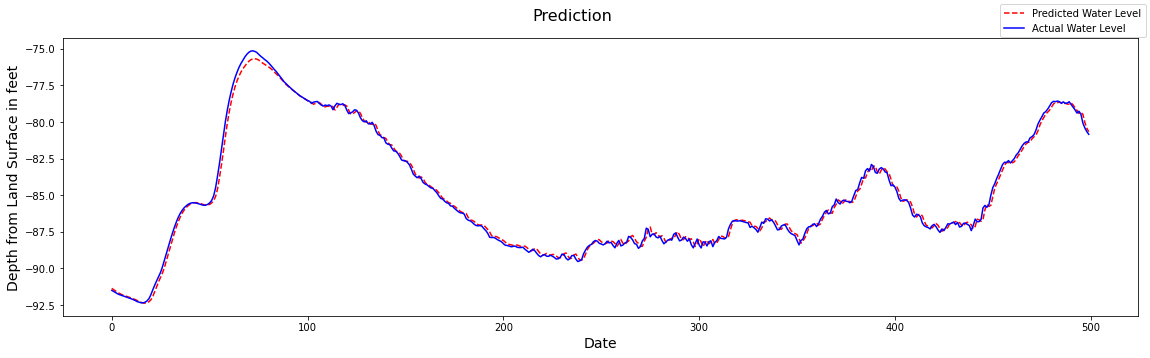

(     Predictions  Actuals
 0      91.357109  91.4921
 1      91.455177  91.5775
 2      91.546608  91.6546
 3      91.629387  91.7333
 4      91.709946  91.7912
 ..           ...      ...
 495    79.341209  79.4696
 496    79.473595  80.0721
 497    80.028641  80.4046
 498    80.420288  80.6565
 499    80.664558  80.8423
 
 [500 rows x 2 columns],
 0.07311024514531803)

In [27]:
plot_predictions1(model1, X_test, y_test)

## A convolutional NN model!

In [34]:
model2 = Sequential()
model2.add(InputLayer((5,1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 4, 64)             192       
                                                                 
 flatten_1 (Flatten)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 8)                 2056      
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2257 (8.82 KB)
Trainable params: 2257 (8.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
cp2 = ModelCheckpoint('meremodel2/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [36]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp2])

Epoch 1/50
 91/110 [=======================>......] - ETA: 0s - loss: 2007.9121 - root_mean_squared_error: 44.8097 INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 1s 5ms/step - loss: 1671.7163 - root_mean_squared_error: 40.8866 - val_loss: 0.6208 - val_root_mean_squared_error: 0.7879
Epoch 2/50
105/110 [===========================>..] - ETA: 0s - loss: 0.1251 - root_mean_squared_error: 0.3537INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1247 - root_mean_squared_error: 0.3532 - val_loss: 0.0687 - val_root_mean_squared_error: 0.2621
Epoch 3/50
108/110 [============================>.] - ETA: 0s - loss: 0.0956 - root_mean_squared_error: 0.3092INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.0954 - root_mean_squared_error: 0.3089 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2619
Epoch 4/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0955 - root_mean_squared_error: 0.3091 - val_loss: 0.0689 - val_root_mean_squared_error: 0.2624
Epoch 5/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0954 - root_mean_squared_error: 0.3089 - val_loss: 0.0694 - val_root_mean_squared_error: 0.2634
Epoch 6/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0956 - root_mean_squared_error: 0.3092 - val_loss: 0.0741 - val_root_mean_squared_error: 0.2723
Epoch 7/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0955 - root_mean_squared_error: 0.3090 - val_loss: 0.0693 - val_root_mean_squared_error: 0.2632
Epoch 8/50
106/110 [===========================>..] - ETA: 0s - loss: 0.0957 - root_mean_squared_error: 0.3094INFO:tensorflow:Assets written to: meremo

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.0957 - root_mean_squared_error: 0.3093 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2616
Epoch 9/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0958 - root_mean_squared_error: 0.3096 - val_loss: 0.0705 - val_root_mean_squared_error: 0.2654
Epoch 10/50
107/110 [============================>.] - ETA: 0s - loss: 0.0957 - root_mean_squared_error: 0.3093INFO:tensorflow:Assets written to: meremodel2/assets


INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.0957 - root_mean_squared_error: 0.3094 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615
Epoch 11/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0958 - root_mean_squared_error: 0.3096 - val_loss: 0.0707 - val_root_mean_squared_error: 0.2658
Epoch 12/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0961 - root_mean_squared_error: 0.3099 - val_loss: 0.0687 - val_root_mean_squared_error: 0.2622
Epoch 13/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0968 - root_mean_squared_error: 0.3111 - val_loss: 0.0687 - val_root_mean_squared_error: 0.2622
Epoch 14/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0965 - root_mean_squared_error: 0.3106 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2619
Epoch 15/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0963 - root_mean_squared_error: 0.3103 - val_loss: 0.0710 - val_root_m

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.0955 - root_mean_squared_error: 0.3091 - val_loss: 0.0683 - val_root_mean_squared_error: 0.2613
Epoch 18/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0976 - root_mean_squared_error: 0.3123 - val_loss: 0.0684 - val_root_mean_squared_error: 0.2615
Epoch 19/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0966 - root_mean_squared_error: 0.3107 - val_loss: 0.0693 - val_root_mean_squared_error: 0.2632
Epoch 20/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0961 - root_mean_squared_error: 0.3100 - val_loss: 0.0703 - val_root_mean_squared_error: 0.2652
Epoch 21/50
110/110 [==============================] - 0s 2ms/step - loss: 0.0965 - root_mean_squared_error: 0.3107 - val_loss: 0.0714 - val_root_mean_squared_error: 0.2672
Epoch 22/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0963 - root_mean_squared_error: 0.3104 - val_loss: 0.0692 - val_root_m

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 1s 7ms/step - loss: 0.0966 - root_mean_squared_error: 0.3108 - val_loss: 0.0678 - val_root_mean_squared_error: 0.2603
Epoch 32/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0963 - root_mean_squared_error: 0.3103 - val_loss: 0.0739 - val_root_mean_squared_error: 0.2718
Epoch 33/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0967 - root_mean_squared_error: 0.3110 - val_loss: 0.0709 - val_root_mean_squared_error: 0.2663
Epoch 34/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0963 - root_mean_squared_error: 0.3103 - val_loss: 0.0698 - val_root_mean_squared_error: 0.2642
Epoch 35/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0973 - root_mean_squared_error: 0.3120 - val_loss: 0.0697 - val_root_mean_squared_error: 0.2639
Epoch 36/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0972 - root_mean_squared_error: 0.3118 - val_loss: 0.0705 - val_root_m

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.0987 - root_mean_squared_error: 0.3142 - val_loss: 0.0674 - val_root_mean_squared_error: 0.2596
Epoch 38/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0987 - root_mean_squared_error: 0.3142 - val_loss: 0.0835 - val_root_mean_squared_error: 0.2889
Epoch 39/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0971 - root_mean_squared_error: 0.3116 - val_loss: 0.0809 - val_root_mean_squared_error: 0.2844
Epoch 40/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0967 - root_mean_squared_error: 0.3110 - val_loss: 0.0827 - val_root_mean_squared_error: 0.2876
Epoch 41/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0964 - root_mean_squared_error: 0.3105 - val_loss: 0.0717 - val_root_mean_squared_error: 0.2677
Epoch 42/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0985 - root_mean_squared_error: 0.3139 - val_loss: 0.0780 - val_root_m

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1009 - root_mean_squared_error: 0.3176 - val_loss: 0.0671 - val_root_mean_squared_error: 0.2590
Epoch 46/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0967 - root_mean_squared_error: 0.3110 - val_loss: 0.0755 - val_root_mean_squared_error: 0.2747
Epoch 47/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0999 - root_mean_squared_error: 0.3161 - val_loss: 0.0860 - val_root_mean_squared_error: 0.2932
Epoch 48/50
110/110 [==============================] - 0s 1ms/step - loss: 0.0991 - root_mean_squared_error: 0.3148 - val_loss: 0.0807 - val_root_mean_squared_error: 0.2842
Epoch 49/50
110/110 [==============================] - 0s 1ms/step - loss: 0.1004 - root_mean_squared_error: 0.3169 - val_loss: 0.0691 - val_root_mean_squared_error: 0.2630
Epoch 50/50
 55/110 [==============>...............] - ETA: 0s - loss: 0.1174 - root_mean_squared_error: 0.3426INFO:tensorflow:Assets written to: m

INFO:tensorflow:Assets written to: meremodel2/assets


110/110 [==============================] - 0s 4ms/step - loss: 0.1086 - root_mean_squared_error: 0.3296 - val_loss: 0.0667 - val_root_mean_squared_error: 0.2582


16/16 [==============================] - 0s 881us/step


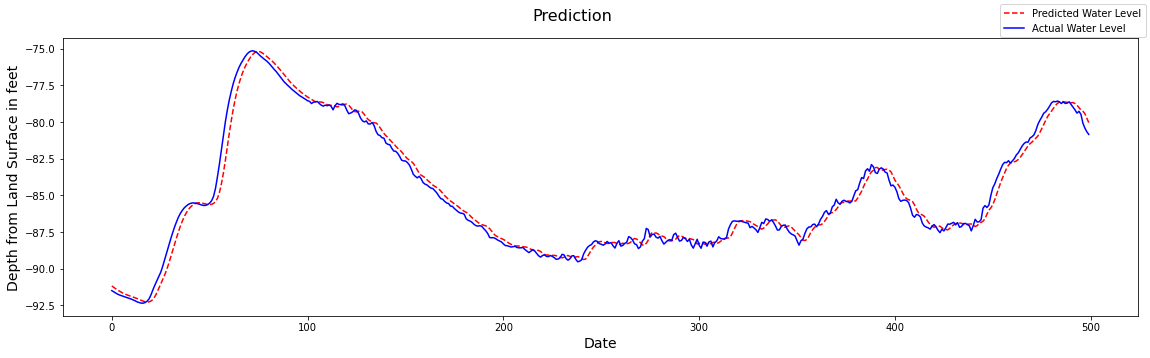

(     Predictions  Actuals
 0      91.171928  91.4921
 1      91.268417  91.5775
 2      91.362457  91.6546
 3      91.450722  91.7333
 4      91.534836  91.7912
 ..           ...      ...
 495    79.170906  79.4696
 496    79.260162  80.0721
 497    79.422615  80.4046
 498    79.726410  80.6565
 499    80.040787  80.8423
 
 [500 rows x 2 columns],
 0.27526525813472974)

In [37]:
model2 = load_model('meremodel2/')
plot_predictions1(model2, X_test, y_test)

## GRU Model

In [38]:
model3 = Sequential()
model3.add(InputLayer((5,1)))
model3.add(GRU(64))
model3.add(Flatten())
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))

model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13393 (52.32 KB)
Trainable params: 13393 (52.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
cp3 = ModelCheckpoint('meremodel3/', save_best_only=True)
# the above makes a folder that our gitignore should exclude

model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [40]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, callbacks=[cp3])

Epoch 1/50
106/110 [===========================>..] - ETA: 0s - loss: 7263.2876 - root_mean_squared_error: 85.2249INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 3s 20ms/step - loss: 7228.6953 - root_mean_squared_error: 85.0217 - val_loss: 6155.3193 - val_root_mean_squared_error: 78.4558
Epoch 2/50
104/110 [===========================>..] - ETA: 0s - loss: 5090.2183 - root_mean_squared_error: 71.3458INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 5035.7954 - root_mean_squared_error: 70.9633 - val_loss: 3973.0583 - val_root_mean_squared_error: 63.0322
Epoch 3/50
109/110 [============================>.] - ETA: 0s - loss: 2965.1270 - root_mean_squared_error: 54.4530INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 19ms/step - loss: 2962.4929 - root_mean_squared_error: 54.4288 - val_loss: 2053.3367 - val_root_mean_squared_error: 45.3138
Epoch 4/50
108/110 [============================>.] - ETA: 0s - loss: 1363.1053 - root_mean_squared_error: 36.9203INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 1356.5282 - root_mean_squared_error: 36.8311 - val_loss: 807.4677 - val_root_mean_squared_error: 28.4160
Epoch 5/50
105/110 [===========================>..] - ETA: 0s - loss: 477.5946 - root_mean_squared_error: 21.8539INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 467.8486 - root_mean_squared_error: 21.6298 - val_loss: 232.2673 - val_root_mean_squared_error: 15.2403
Epoch 6/50
102/110 [==========================>...] - ETA: 0s - loss: 125.8828 - root_mean_squared_error: 11.2197INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 121.1268 - root_mean_squared_error: 11.0058 - val_loss: 52.9124 - val_root_mean_squared_error: 7.2741
Epoch 7/50
104/110 [===========================>..] - ETA: 0s - loss: 30.8740 - root_mean_squared_error: 5.5564INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 20ms/step - loss: 30.3480 - root_mean_squared_error: 5.5089 - val_loss: 14.8776 - val_root_mean_squared_error: 3.8571
Epoch 8/50
108/110 [============================>.] - ETA: 0s - loss: 14.3217 - root_mean_squared_error: 3.7844INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 14.3168 - root_mean_squared_error: 3.7838 - val_loss: 8.8903 - val_root_mean_squared_error: 2.9817
Epoch 9/50
108/110 [============================>.] - ETA: 0s - loss: 12.3240 - root_mean_squared_error: 3.5106INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 12.3028 - root_mean_squared_error: 3.5075 - val_loss: 8.0419 - val_root_mean_squared_error: 2.8358
Epoch 10/50
109/110 [============================>.] - ETA: 0s - loss: 12.0951 - root_mean_squared_error: 3.4778INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 12.1102 - root_mean_squared_error: 3.4800 - val_loss: 7.8901 - val_root_mean_squared_error: 2.8089
Epoch 11/50
107/110 [============================>.] - ETA: 0s - loss: 12.1315 - root_mean_squared_error: 3.4830INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 12.1026 - root_mean_squared_error: 3.4789 - val_loss: 7.8880 - val_root_mean_squared_error: 2.8086
Epoch 12/50
108/110 [============================>.] - ETA: 0s - loss: 12.1427 - root_mean_squared_error: 3.4846INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 21ms/step - loss: 12.0985 - root_mean_squared_error: 3.4783 - val_loss: 7.8569 - val_root_mean_squared_error: 2.8030
Epoch 13/50
 98/110 [=========================>....] - ETA: 0s - loss: 11.4986 - root_mean_squared_error: 3.3910INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 11.5471 - root_mean_squared_error: 3.3981 - val_loss: 7.4233 - val_root_mean_squared_error: 2.7246
Epoch 14/50
109/110 [============================>.] - ETA: 0s - loss: 9.2807 - root_mean_squared_error: 3.0464INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 9.2781 - root_mean_squared_error: 3.0460 - val_loss: 5.1228 - val_root_mean_squared_error: 2.2634
Epoch 15/50
107/110 [============================>.] - ETA: 0s - loss: 4.2712 - root_mean_squared_error: 2.0667INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 4.2480 - root_mean_squared_error: 2.0611 - val_loss: 2.2943 - val_root_mean_squared_error: 1.5147
Epoch 16/50
106/110 [===========================>..] - ETA: 0s - loss: 1.6623 - root_mean_squared_error: 1.2893INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 20ms/step - loss: 1.6449 - root_mean_squared_error: 1.2826 - val_loss: 0.9821 - val_root_mean_squared_error: 0.9910
Epoch 17/50
104/110 [===========================>..] - ETA: 0s - loss: 0.8726 - root_mean_squared_error: 0.9341INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.8563 - root_mean_squared_error: 0.9254 - val_loss: 0.5665 - val_root_mean_squared_error: 0.7526
Epoch 18/50
100/110 [==========================>...] - ETA: 0s - loss: 0.5715 - root_mean_squared_error: 0.7560INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.5627 - root_mean_squared_error: 0.7502 - val_loss: 0.4217 - val_root_mean_squared_error: 0.6494
Epoch 19/50
 98/110 [=========================>....] - ETA: 0s - loss: 0.4165 - root_mean_squared_error: 0.6453INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.4088 - root_mean_squared_error: 0.6394 - val_loss: 0.2772 - val_root_mean_squared_error: 0.5265
Epoch 20/50
106/110 [===========================>..] - ETA: 0s - loss: 0.2941 - root_mean_squared_error: 0.5423INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.2905 - root_mean_squared_error: 0.5390 - val_loss: 0.1984 - val_root_mean_squared_error: 0.4454
Epoch 21/50
104/110 [===========================>..] - ETA: 0s - loss: 0.1854 - root_mean_squared_error: 0.4306INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 21ms/step - loss: 0.1838 - root_mean_squared_error: 0.4288 - val_loss: 0.1520 - val_root_mean_squared_error: 0.3899
Epoch 22/50
106/110 [===========================>..] - ETA: 0s - loss: 0.1406 - root_mean_squared_error: 0.3750INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.1416 - root_mean_squared_error: 0.3763 - val_loss: 0.1388 - val_root_mean_squared_error: 0.3726
Epoch 23/50
107/110 [============================>.] - ETA: 0s - loss: 0.1175 - root_mean_squared_error: 0.3428INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.1172 - root_mean_squared_error: 0.3424 - val_loss: 0.0817 - val_root_mean_squared_error: 0.2858
Epoch 24/50
103/110 [===========================>..] - ETA: 0s - loss: 0.1124 - root_mean_squared_error: 0.3352INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.1110 - root_mean_squared_error: 0.3332 - val_loss: 0.0681 - val_root_mean_squared_error: 0.2609
Epoch 25/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0906 - root_mean_squared_error: 0.3010 - val_loss: 0.0837 - val_root_mean_squared_error: 0.2893
Epoch 26/50
108/110 [============================>.] - ETA: 0s - loss: 0.0875 - root_mean_squared_error: 0.2958INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0873 - root_mean_squared_error: 0.2955 - val_loss: 0.0597 - val_root_mean_squared_error: 0.2444
Epoch 27/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0905 - root_mean_squared_error: 0.3008 - val_loss: 0.0756 - val_root_mean_squared_error: 0.2750
Epoch 28/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0788 - root_mean_squared_error: 0.2807 - val_loss: 0.1019 - val_root_mean_squared_error: 0.3192
Epoch 29/50
109/110 [============================>.] - ETA: 0s - loss: 0.0789 - root_mean_squared_error: 0.2808INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0787 - root_mean_squared_error: 0.2806 - val_loss: 0.0486 - val_root_mean_squared_error: 0.2204
Epoch 30/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0741 - root_mean_squared_error: 0.2722 - val_loss: 0.0745 - val_root_mean_squared_error: 0.2730
Epoch 31/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0728 - root_mean_squared_error: 0.2698 - val_loss: 0.0552 - val_root_mean_squared_error: 0.2348
Epoch 32/50
110/110 [==============================] - ETA: 0s - loss: 0.0725 - root_mean_squared_error: 0.2692INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0725 - root_mean_squared_error: 0.2692 - val_loss: 0.0466 - val_root_mean_squared_error: 0.2158
Epoch 33/50
108/110 [============================>.] - ETA: 0s - loss: 0.0680 - root_mean_squared_error: 0.2608INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 17ms/step - loss: 0.0679 - root_mean_squared_error: 0.2605 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2119
Epoch 34/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0732 - root_mean_squared_error: 0.2706 - val_loss: 0.0472 - val_root_mean_squared_error: 0.2173
Epoch 35/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0671 - root_mean_squared_error: 0.2590 - val_loss: 0.0541 - val_root_mean_squared_error: 0.2327
Epoch 36/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0729 - root_mean_squared_error: 0.2701 - val_loss: 0.0677 - val_root_mean_squared_error: 0.2602
Epoch 37/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0721 - root_mean_squared_error: 0.2685 - val_loss: 0.0533 - val_root_mean_squared_error: 0.2309
Epoch 38/50
101/110 [==========================>...] - ETA: 0s - loss: 0.0763 - root_mean_squared_error: 0.2761INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 20ms/step - loss: 0.0759 - root_mean_squared_error: 0.2756 - val_loss: 0.0438 - val_root_mean_squared_error: 0.2093
Epoch 39/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0688 - root_mean_squared_error: 0.2623 - val_loss: 0.0920 - val_root_mean_squared_error: 0.3033
Epoch 40/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0771 - root_mean_squared_error: 0.2776 - val_loss: 0.0567 - val_root_mean_squared_error: 0.2381
Epoch 41/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0683 - root_mean_squared_error: 0.2613 - val_loss: 0.0516 - val_root_mean_squared_error: 0.2271
Epoch 42/50
100/110 [==========================>...] - ETA: 0s - loss: 0.0672 - root_mean_squared_error: 0.2591INFO:tensorflow:Assets written to: meremodel3/assets


INFO:tensorflow:Assets written to: meremodel3/assets


110/110 [==============================] - 2s 18ms/step - loss: 0.0654 - root_mean_squared_error: 0.2558 - val_loss: 0.0391 - val_root_mean_squared_error: 0.1977
Epoch 43/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0609 - root_mean_squared_error: 0.2467 - val_loss: 0.0449 - val_root_mean_squared_error: 0.2118
Epoch 44/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0712 - root_mean_squared_error: 0.2668 - val_loss: 0.0463 - val_root_mean_squared_error: 0.2152
Epoch 45/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0792 - root_mean_squared_error: 0.2815 - val_loss: 0.0735 - val_root_mean_squared_error: 0.2711
Epoch 46/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0681 - root_mean_squared_error: 0.2610 - val_loss: 0.0412 - val_root_mean_squared_error: 0.2030
Epoch 47/50
110/110 [==============================] - 0s 3ms/step - loss: 0.0843 - root_mean_squared_error: 0.2904 - val_loss: 0.0436 - val_root_

16/16 [==============================] - 0s 1ms/step


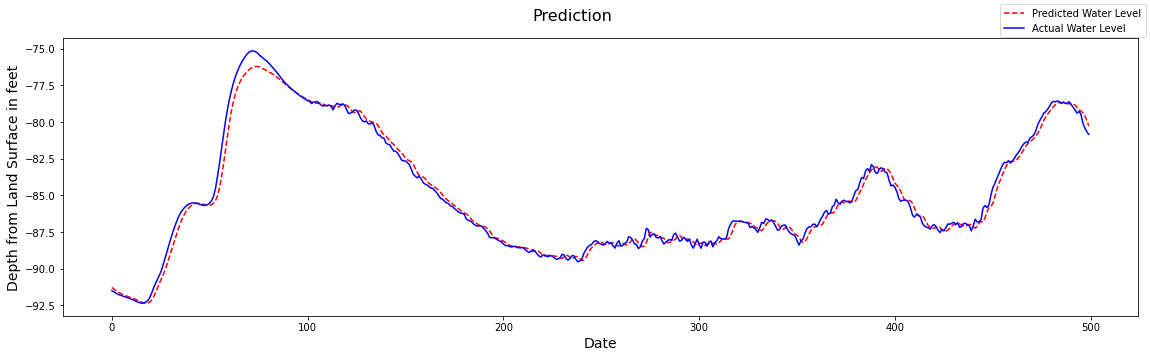

(     Predictions  Actuals
 0      91.281036  91.4921
 1      91.377777  91.5775
 2      91.472801  91.6546
 3      91.561340  91.7333
 4      91.644936  91.7912
 ..           ...      ...
 495    79.252167  79.4696
 496    79.359177  80.0721
 497    79.566071  80.4046
 498    79.886284  80.6565
 499    80.264435  80.8423
 
 [500 rows x 2 columns],
 0.1997691113039774)

In [41]:
model3 = load_model('meremodel3/')
plot_predictions1(model3, X_test, y_test)

## Multivariate tutorial

both of these tutorials skip basically all explanation; I need to go through Marcos' notebooks and whatnot, but below is following the second one listed above. [This one](https://www.youtube.com/watch?v=kGdbPnMCdOg) starting around 17 minutes in (the first 17 minutes are doing the CNN and GRU above)

In [44]:
# recall the average well measurements are stored in well
well

date
2006-02-07    91.0100
2006-02-08    91.0429
2006-02-09    91.1096
2006-02-10    91.1954
2006-02-11    91.3012
               ...   
2018-06-02    79.4696
2018-06-03    80.0721
2018-06-04    80.4046
2018-06-05    80.6565
2018-06-06    80.8423
Name: avg_well_depth, Length: 4503, dtype: float64

In [46]:
well_df = pd.DataFrame({'avg_well_depth':well})
well_df['Seconds'] = well_df.index.map(pd.Timestamp.timestamp)
well_df

,avg_well_depth,Seconds
date,,
2006-02-07,91.0100,1.139270e+09
2006-02-08,91.0429,1.139357e+09
2006-02-09,91.1096,1.139443e+09
2006-02-10,91.1954,1.139530e+09
2006-02-11,91.3012,1.139616e+09
...,...,...
2018-06-02,79.4696,1.527898e+09
2018-06-03,80.0721,1.527984e+09
2018-06-04,80.4046,1.528070e+09


In [47]:
day = 60*60*24
year = 365.2425*day

well_df['Year sin'] = np.sin(well_df['Seconds'] * (2 * np.pi / year))
well_df['Year cos'] = np.cos(well_df['Seconds'] * (2 * np.pi / year))

well_df = well_df.drop('Seconds', axis=1)
well_df.head()

,avg_well_depth,Year sin,Year cos
date,,,
2006-02-07,91.0100,0.598115,0.801410
2006-02-08,91.0429,0.611813,0.791003
2006-02-09,91.1096,0.625329,0.780361
2006-02-10,91.1954,0.638660,0.769489
2006-02-11,91.3012,0.651802,0.758389


In [54]:
well_df['gage_ht'] = df.gage_ht.values
well_df['prcp'] = df.prcp.values
well_df.head()

,avg_well_depth,Year sin,Year cos,gage_ht,prcp
date,,,,,
2006-02-07,91.0100,0.598115,0.801410,21.65,0.0
2006-02-08,91.0429,0.611813,0.791003,21.64,0.0
2006-02-09,91.1096,0.625329,0.780361,21.58,0.0
2006-02-10,91.1954,0.638660,0.769489,21.46,0.0
2006-02-11,91.3012,0.651802,0.758389,21.36,0.0


In [65]:
def df_to_X_y_multi(df, window_size=6):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [66]:
X2, y2 = df_to_X_y_multi(well_df)
X2.shape, y2.shape

((4497, 6, 5), (4497,))

### Train Test Split

In [68]:
X2_train, y2_train = X2[:3497], y2[:3497]
X2_val, y2_val = X2[3497:3997], y2[3497:3997]
X2_test, y2_test = X2[3997:], y2[3997:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((3497, 6, 5), (3497,), (500, 6, 5), (500,), (500, 6, 5), (500,))

### Scaling